In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

np.set_printoptions(suppress=True)
# np.set_printoptions(precision=2) #设精度为3
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

data = np.loadtxt("./data/data2.csv", delimiter=",", skiprows=1)
print(data[0:10,0])
print(data[0:10,1])

[ 5. -5.  5.  5. -5.  5. -5. -5.  5. -5.]
[-6.92210117 -4.55802076 -4.22761992 -2.34581391  8.13964874 12.08510634
 14.23268223  8.8254145  -2.58526772 -6.79588678]


1.4965964820418807


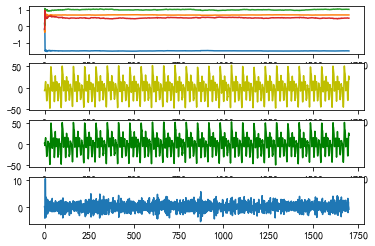

In [2]:
# RLS or REF
# 参数初始化
na = 2
nb = 2
nMax = max(na, nb)
L = 1700 # 数据长度
a = 1000
mu = 0.99

# 序列初始化
h = np.zeros((na + nb, 1))
P = np.array([a**2 * np.eye((na + nb))] * (L + nMax))
s = np.zeros(L + nMax) # 数
Inn = np.zeros(L + nMax) # 数
K = np.zeros((na + nb, 1))
Theta0 = np.zeros((na + nb, 1))   # [a1,a2,b1,b2].T
Theta = np.zeros((na + nb, 1))   # [a1,a2,b1,b2].T
J = np.zeros(L + nMax)
a1 = []
a2 = []
b1 = []
b2 = []

np.random.seed(1000)
# u = np.linspace(0, 10, nMax + L).reshape(-1,1)
# z = u ** 1.5 + 1+ np.random.randn(len(u), 1)*0.5
u = data[:, 0]
z = data[:, 1]
z_pre = np.ones((len(z), 1))
# print(u)
# print(z)
plt.plot(range(len(z)), z)
# plt.show()


for k in range(nMax, L + nMax):
    for i in range(na):
        h[i] = -1 * z[k - i - 1]
    for j in range(nb):
        h[na + j] = u[k - j - 1]
    s[k] = h.T @ P[k - 1] @ h + mu
    Inn[k] = z[k] - h.T @ Theta0
    K = P[k - 1] @ h / s[k]
    P[k] = (P[k-1] - K @ K.T * s[k])/mu
    Theta = Theta0 + K * Inn[k]
    Theta0 = Theta # 保存本次迭代
    a1.append(Theta[0])
    a2.append(Theta[1])
    b1.append(Theta[2])
    b2.append(Theta[3])
    
    J[k] = J[k-1] + Inn[k]**2 / s[k]
    if k >= nMax:
        z_pre[k] = np.array([-1*z[k-1], -1*z[k-2],  u[k-1], u[k-2]]) @ Theta

plt.figure(1,figsize=(15,7))
ax1 =  plt.subplot(4,1,1)
ax1.plot(range(len(a1)), a1, 
         range(len(a2)), a2, 
         range(len(b1)), b1,
         range(len(b2)), b2,)

ax2 = plt.subplot(4,1,2)
ax2 = plt.plot(range(L), z[0:L], 'y')

ax3 = plt.subplot(4,1,3)
ax3.plot(range(L), z_pre[0:L], 'g')

ax4 = plt.subplot(4,1,4)
ax4.plot(range(len(Inn)), Inn)

print(np.sqrt(J[L + nMax - 1]/L))